Just looking at the HET data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from scipy.optimize import leastsq
from scipy.interpolate import interp1d
from astropy.modeling import models, fitting
from astropy.time import Time

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
# hetpath = '/media/david/5tb_storage1/gas_discs/0845/het_data/UT21-1-016/'
hetpath = '/media/david/1tb_storage1/emergency_data/het_gas/UT21-1-016/'

hetspecs = glob.glob('{}spectrum*d.fits'.format(hetpath)) #just the red arm
hetspecs

['/media/david/1tb_storage1/emergency_data/het_gas/UT21-1-016/spectrum_20210108_0000023_exp01_farred.fits',
 '/media/david/1tb_storage1/emergency_data/het_gas/UT21-1-016/spectrum_20210108_0000023_exp01_red.fits']

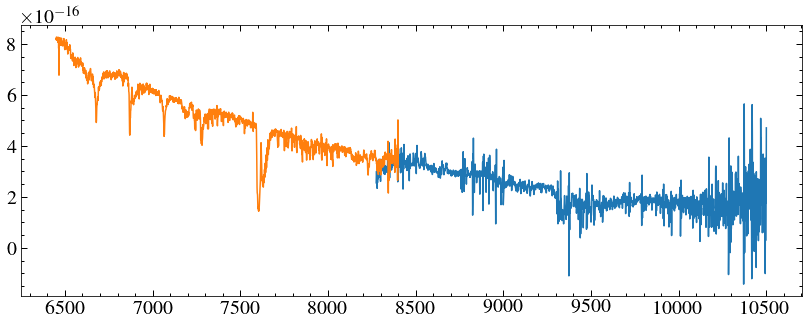

In [4]:
for spec in hetspecs:
    data = fits.getdata(spec)
    w, f, e = data[0], data[1], data[3]
    plt.plot(w,f)

In [8]:
def make_plot_spec(w, f, e, mask1, mask2, smooth=10): #cuts spectrum down to the bit to plot
    #mask = (w > 8450) & (w < 8480) | (w > 8520) & (w <8540) | (w > 8560) & (w< 8660) | (w > 8680) & (w < 8700) #mask out emmission lines
    fitter = fitting.LinearLSQFitter()
    w1, f1 = w[mask1], f[mask1]
    n_init = models.Polynomial1D(3)
    n_fit = fitter(n_init, w1, f1)
    #mask = (w > 8450) & (w < 8700)
    nf = f/n_fit(w)
    ne = e/n_fit(w)
    if smooth == 0:
        smooth = 1
    nf = convolve(nf,Box1DKernel(smooth))
    ne = convolve(ne,Box1DKernel(smooth))/smooth**0.5
    w1, f1, e1 = w[mask2], nf[mask2], ne[mask2]
    return w1,f1, e1
    

 [astropy.modeling.fitting]


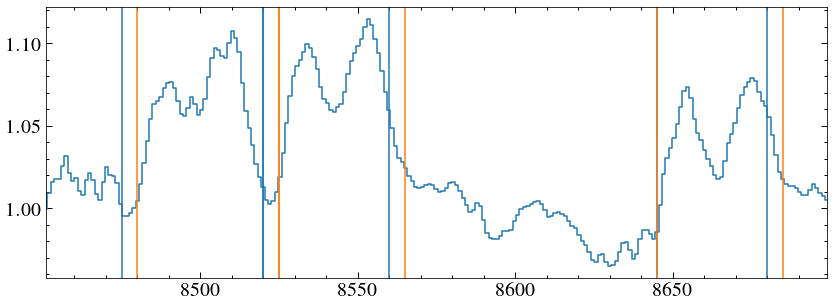

In [16]:
frspec = hetspecs[0]
data = fits.getdata(frspec)
w, f, e = data[0], data[1], data[3]
trips = [[8475,8520], [8520,8560], [8645, 8680]]

trips2 = [[8480,8525], [8525,8565], [8645, 8685]]

mask1 = (w > 8400) & (w < 8475) | (w > 8515) & (w < 8522) | (w > 8565)  & (w< 8640) | (w > 8685) & (w < 8750)
mask2 = (w> 8450) & (w < 8700) 
wn, fn, en =  make_plot_spec(w, f,e , mask1, mask2, smooth=10)
plt.step(wn, fn, where='mid')
plt.xlim(8451, 8699)

for trip in trips:
    [plt.axvline(line) for line in trip]
    
for trip in trips2:
    [plt.axvline(line, c='C1') for line in trip]  

32.454221788381204


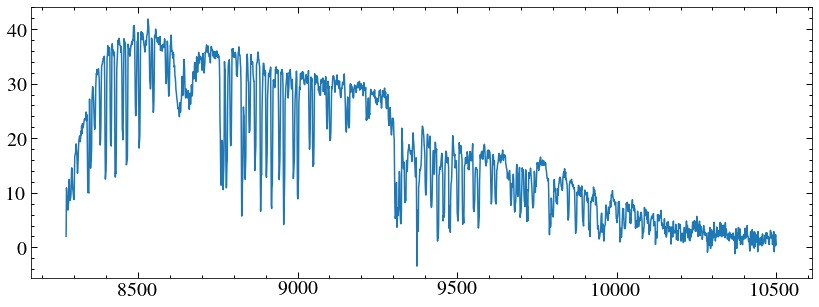

In [21]:
plt.plot(w, f/e)
print(np.median(f[w <8800]/e[w<8800]))

Stitching/cutting the overlap?  

(0.0, 1e-15)

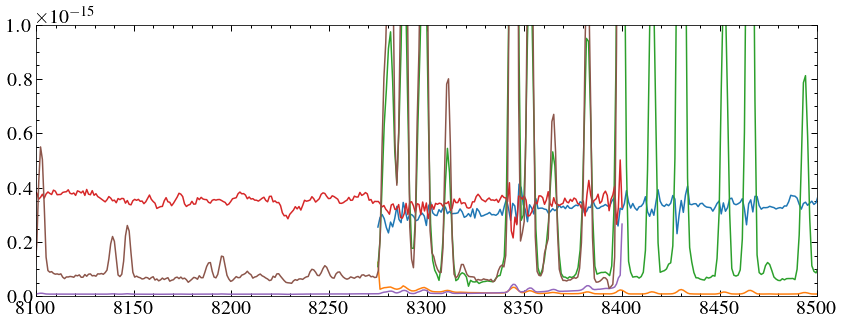

In [15]:
for spec in hetspecs:
    data = fits.getdata(spec)
    w, f, e = data[0], data[1], data[3]
    plt.plot(w,f)
    plt.plot(w, e)
    plt.plot(w, data[2])
plt.xlim(8100, 8500)
plt.ylim(0, 1e-15)